In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib
import seaborn as sns
import os
from scipy.stats import zscore

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
HOME = os.getcwd() + '/drive/MyDrive/Colab_Notebooks/ML Services Practice'

In [4]:
df = pd.read_csv(f'{HOME}/NHANES_age_prediction.csv')

In [ ]:
len(df)

2278

In [ ]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


1. SEQN: Уникальный идентификатор участника.
2. age_group: Целевая переменная, указывающая возрастную группу участника ('Adult' или 'Senior').
3. RIDAGEYR: Возраст участника. Этот признак не будет использоваться для построения модели.
4. RIAGENDR: Пол участника.
5. PAQ605: Информация об уровне физической активности.
6. BMXBMI: Индекс массы тела.
7. LBXGLU: Уровень глюкозы в крови.
8. DIQ010: Диагноз диабета.
9. LBXGLT: Тест на толерантность к глюкозе.
10. LBXIN: Уровень инсулина.

In [5]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

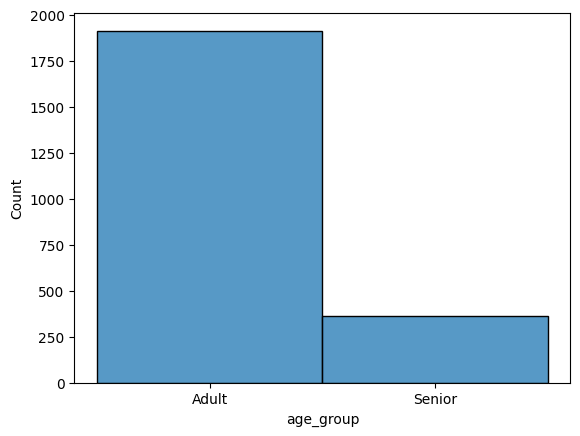

In [6]:
sns_plot = sns.histplot(df['age_group'])

In [7]:
df = df.drop(['SEQN', 'RIDAGEYR'], axis=1)

In [8]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Senior
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0


In [ ]:
corr = df.corr()

In [ ]:
corr

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Senior
RIAGENDR,1.000000,0.151076,0.063873,-0.132342,-0.032769,0.017406,-0.016660,-0.002767
PAQ605,0.151076,1.000000,-0.042935,-0.007849,-0.002599,0.060413,0.010011,0.094789
BMXBMI,0.063873,-0.042935,1.000000,0.208330,0.047133,0.193375,0.552717,-0.004147
LBXGLU,-0.132342,-0.007849,0.208330,1.000000,-0.004427,0.685579,0.211911,0.116462
DIQ010,-0.032769,-0.002599,0.047133,-0.004427,1.000000,0.009796,0.058986,0.026399
LBXGLT,0.017406,0.060413,0.193375,0.685579,0.009796,1.000000,0.217272,0.243113
LBXIN,-0.016660,0.010011,0.552717,0.211911,0.058986,0.217272,1.000000,-0.064159
age_group_Senior,-0.002767,0.094789,-0.004147,0.116462,0.026399,0.243113,-0.064159,1.000000


<Axes: >

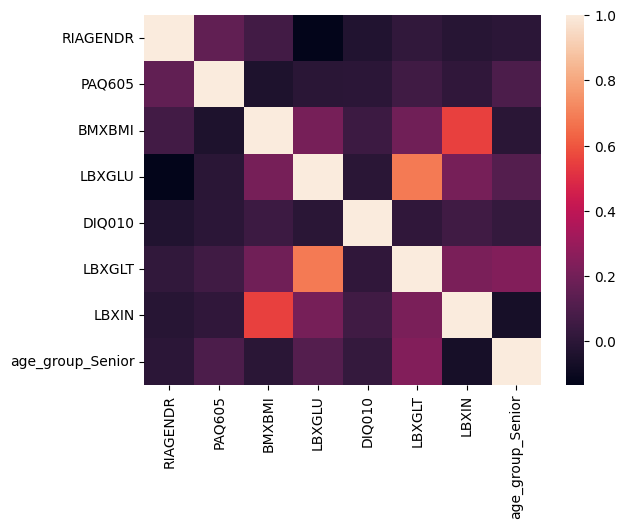

In [ ]:
sns.heatmap(corr)

In [ ]:
df[df['age_group_Senior'] == 1].describe()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Senior
count,364.000000,364.000000,364.000000,364.00000,364.000000,364.000000,364.000000,364.0
mean,1.508242,1.909341,27.886264,104.32967,2.027473,141.208791,10.405247,1.0
std,0.500620,0.287519,5.574166,14.96667,0.266211,51.549440,7.530538,0.0
min,1.000000,1.000000,16.800000,80.00000,1.000000,48.000000,1.020000,1.0
25%,1.000000,2.000000,24.200000,95.00000,2.000000,104.000000,5.247500,1.0
50%,2.000000,2.000000,27.200000,101.00000,2.000000,131.000000,8.465000,1.0
75%,2.000000,2.000000,30.600000,111.00000,2.000000,166.250000,13.212500,1.0
max,2.000000,2.000000,52.200000,208.00000,3.000000,346.000000,52.890000,1.0


In [ ]:
df[df['age_group_Senior'] == 0].describe()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Senior
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.0
mean,1.512017,1.806165,27.968286,98.644723,2.014107,109.990596,12.106661,0.0
std,0.499986,0.414761,7.526555,18.255726,0.165850,44.453655,10.060040,0.0
min,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000,0.0
25%,1.000000,2.000000,22.600000,91.000000,2.000000,84.000000,5.982500,0.0
50%,2.000000,2.000000,26.750000,96.000000,2.000000,101.000000,9.200000,0.0
75%,2.000000,2.000000,31.400000,103.000000,2.000000,124.000000,14.790000,0.0
max,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000,0.0


In [9]:
x, y = df.drop(['age_group_Senior'], axis=1), df['age_group_Senior']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Linear Regression

In [ ]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='saga', penalty='l1', class_weight="balanced")

In [ ]:
log_reg.fit(x_train_std, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

In [ ]:
y_pred = log_reg.predict(x_test_std)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7302631578947368
Recall: 0.6301369863013698
Precision: 0.323943661971831
F1 Score: 0.42790697674418604


In [ ]:
joblib.dump(log_reg, f'{HOME}/log_reg.pkl')

['/content/drive/MyDrive/Colab_Notebooks/ML Services Practice/log_reg.pkl']

# SVM

In [11]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [77]:
svm = SVC(kernel='rbf', gamma=1e-3, C=100, class_weight='balanced', random_state=42)

In [78]:
svm.fit(x_train_std, y_train)

SVC(C=100, class_weight='balanced', gamma=0.001, random_state=42)

In [79]:
y_pred = svm.predict(x_test_std)

In [80]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.75
Recall: 0.684931506849315
Precision: 0.3546099290780142
F1 Score: 0.4672897196261682


In [81]:
joblib.dump(svm, f'{HOME}/svm.pkl')

['/content/drive/MyDrive/Colab_Notebooks/ML Services Practice/svm.pkl']

# Random Forest

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=15, bootstrap=True, class_weight='balanced', random_state=42)

In [ ]:
rand_forest.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=15, random_state=42)

In [ ]:
y_pred = rand_forest.predict(x_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7675438596491229
Recall: 0.6575342465753424
Precision: 0.37209302325581395
F1 Score: 0.4752475247524752


In [ ]:
joblib.dump(rand_forest, f'{HOME}/rand_forest.pkl')

['/content/drive/MyDrive/Colab_Notebooks/ML Services Practice/rand_forest.pkl']

# XGBoost

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [ ]:
xgb_classifier = XGBClassifier(booster='dart', learning_rate=0.02, n_estimators=120, max_depth=4,
                               reg_lambda=2, gamma=0.1, min_child_weight=10, num_parallel_tree=1,
                               objective='binary:logistic', random_state=42)

In [ ]:
xgb_classifier.fit(x_train, y_train, sample_weight=classes_weights)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=1, random_state=42, ...)

In [ ]:
y_pred = xgb_classifier.predict(x_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7390350877192983
Recall: 0.7534246575342466
Precision: 0.3525641025641026
F1 Score: 0.480349344978166


In [ ]:
joblib.dump(xgb_classifier, f'{HOME}/xgb_classifier.pkl')

['/content/drive/MyDrive/Colab_Notebooks/ML Services Practice/xgb_classifier.pkl']